In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings("ignore")

In [19]:
internet = pd.read_csv('dataset\\Internet-Demographic.csv')
internet

,Country Name,Country Code,Birth rate,Internet users,Income Group
0,Aruba,ABW,10.244,78.9,High income
1,Afghanistan,AFG,35.253,5.9,Low income
2,Angola,AGO,45.985,19.1,Upper middle income
3,Albania,ALB,12.877,57.2,Upper middle income
4,United Arab Emirates,ARE,11.044,88.0,High income
...,...,...,...,...,...
190,"Yemen, Rep.",YEM,32.947,20.0,Lower middle income
191,South Africa,ZAF,20.850,46.5,Upper middle income
192,"Congo, Dem. Rep.",COD,42.394,2.2,Low income
193,Zambia,ZMB,40.471,15.4,Lower middle income


In [13]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    195 non-null    object 
 1   Country Code    195 non-null    object 
 2   Birth rate      195 non-null    float64
 3   Internet users  195 non-null    float64
 4   Income Group    195 non-null    object 
dtypes: float64(2), object(3)
memory usage: 7.7+ KB


In [5]:
internet.dtypes

Country Name       object
Country Code       object
Birth rate        float64
Internet users    float64
Income Group       object
dtype: object

In [6]:
internet.isnull().sum()

Country Name      0
Country Code      0
Birth rate        0
Internet users    0
Income Group      0
dtype: int64

<h1> Changing Data Types

In [8]:
internet['Country Name'] = internet['Country Name'].astype('category')
internet['Country Code'] = internet['Country Code'].astype('category')
internet['Income Group'] = internet['Income Group'].astype('category')

In [9]:
internet.dtypes

Country Name      category
Country Code      category
Birth rate         float64
Internet users     float64
Income Group      category
dtype: object

<h1> Analysis

<h1> 1. is their a correlation between birth rate and internet usage across countries?

In [21]:
correlation = internet['Birth rate'].corr(internet['Internet users'])
correlation

np.float64(-0.8155885551284763)

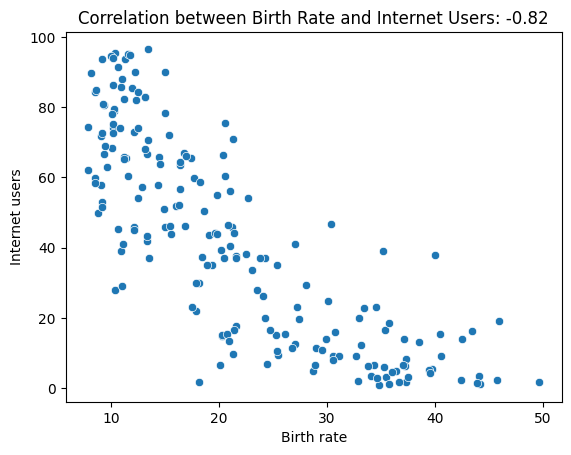

In [32]:
correlation = internet['Birth rate'].corr(internet['Internet users'])
sns.scatterplot(x='Birth rate', y='Internet users', data=internet)
plt.title(f'Correlation between Birth Rate and Internet Users: {correlation:.2f}')
plt.show()

<h2> Insight 1 </h2>

<h3> The correlation between birth rate and internet usage is strongly negative at around -0.82. This indicates that countries with higher birth rates tend to have significantly lower internet usage, suggesting a strong inverse relationship likely influenced by economic development and technological access. </h3>

<hr style="border: 3px solid crimson; width: 90%; margin-left: auto; margin-right: auto; border-radius: 10px;">

<h1> 2. Which country has the highest internet usage?

In [36]:
max_internet_usage = internet.loc[internet['Internet users'].idxmax()]
max_internet_usage

Country Name               Iceland
Country Code                   ISL
Birth rate                    13.4
Internet users             96.5468
Income Group           High income
Birth rate category            Low
Name: 84, dtype: object

In [39]:
top_10 = internet.sort_values(by='Internet users', ascending=False).head(10)
top_10

,Country Name,Country Code,Birth rate,Internet users,Income Group,Birth rate category
84,Iceland,ISL,13.40,96.54680,High income,Low
22,Bermuda,BMU,10.40,95.30000,High income,Low
131,Norway,NOR,11.60,95.05340,High income,Low
163,Sweden,SWE,11.80,94.78360,High income,Low
47,Denmark,DNK,10.00,94.62970,High income,Low
130,Netherlands,NLD,10.20,93.95640,High income,Low
102,Liechtenstein,LIE,9.20,93.80000,High income,Low
106,Luxembourg,LUX,11.30,93.77650,High income,Low
56,Finland,FIN,10.70,91.51440,High income,Low
17,Bahrain,BHR,15.04,90.00004,High income,Low


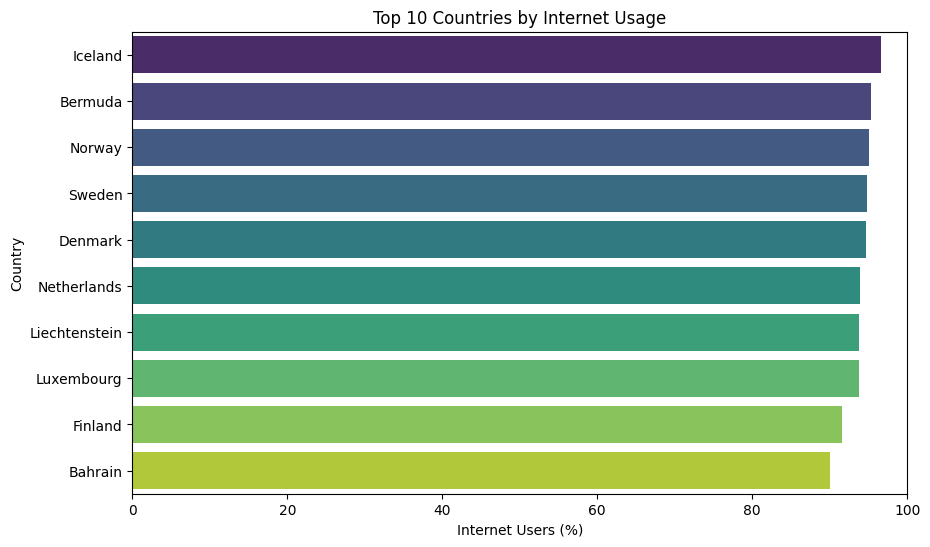

In [40]:
plt.figure(figsize=(10, 6))
sns.barplot(y='Country Name', x='Internet users', data=top_10, palette='viridis')
plt.title('Top 10 Countries by Internet Usage')
plt.xlabel('Internet Users (%)')
plt.ylabel('Country')
plt.xlim(0, 100)
plt.show()

<h2> Insight 2 </h2>

<h3> Iceland leads globally in internet usage, nearing full population coverage. With over 99% of its population online, it significantly outpaces other high-ranking countries like Norway and Denmark. This dominance reflects a strong digital infrastructure, widespread accessibility, and a highly connected society, setting a benchmark for global internet penetration. </h3>

<hr style="border: 3px solid crimson; width: 90%; margin-left: auto; margin-right: auto; border-radius: 10px;">

<h1> 3. How does internet usage vary across different income groups?

In [41]:
income_group_usage = internet.groupby('Income Group')['Internet users'].mean().sort_values(ascending=False)
income_group_usage

Income Group
High income            74.231684
Upper middle income    40.279577
Lower middle income    22.366386
Low income              5.988333
Name: Internet users, dtype: float64

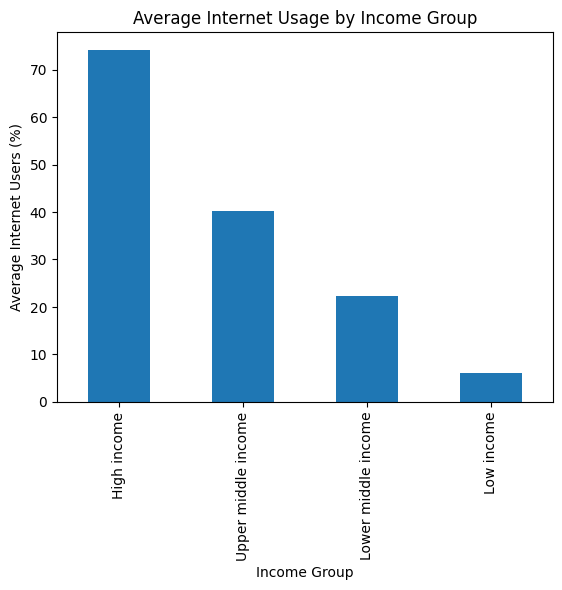

In [42]:
income_group_usage.plot(kind='bar')
plt.title('Average Internet Usage by Income Group')
plt.ylabel('Average Internet Users (%)')
plt.show()

<h2> Insight 3 </h2>

<h3> Internet usage shows a steep gradient across income groups—high-income countries average 74% connectivity, while low-income countries lag far behind at just 6%. Upper-middle and lower-middle income nations fall in between, at roughly 40% and 22% respectively. This stark divide highlights how economic status strongly influences digital access and the global digital divide remains a pressing issue. </h3>

<hr style="border: 3px solid crimson; width: 90%; margin-left: auto; margin-right: auto; border-radius: 10px;">

<h1> 4.  What are the top 10 countries with the highest internet usage?

In [46]:
top_10_countries = internet.sort_values(by='Internet users', ascending=False).head(10)
top_10_countries[['Country Name', 'Internet users']]

,Country Name,Internet users
84,Iceland,96.54680
22,Bermuda,95.30000
131,Norway,95.05340
163,Sweden,94.78360
47,Denmark,94.62970
130,Netherlands,93.95640
102,Liechtenstein,93.80000
106,Luxembourg,93.77650
56,Finland,91.51440
17,Bahrain,90.00004


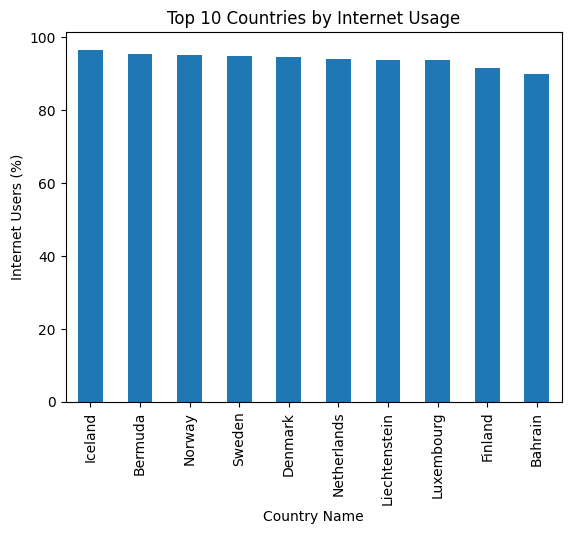

In [43]:
top_10_countries[['Country Name', 'Internet users']].set_index('Country Name').plot(kind='bar', legend=False)
plt.title('Top 10 Countries by Internet Usage')
plt.ylabel('Internet Users (%)')
plt.show()

<h2> Insight 4 </h2>

<h3> Iceland tops the list with 96.5% internet penetration, closely followed by other high-income, predominantly European nations like Norway, Sweden, and Denmark—all exceeding 94%. This concentration of top-ranking countries in Northern and Western Europe reflects the region's robust infrastructure, strong digital policies, and widespread public access. </h3>

<hr style="border: 3px solid crimson; width: 90%; margin-left: auto; margin-right: auto; border-radius: 10px;">

<h1> 5. How does the birth rate impact the internet usage across different countries?

In [47]:
internet['Birth rate category'] = pd.cut(internet['Birth rate'], bins=3, labels=['Low', 'Medium', 'High'])
birth_rate_impact = internet.groupby('Birth rate category')['Internet users'].mean()

birth_rate_impact

Birth rate category
Low       58.904313
Medium    18.184167
High       7.871154
Name: Internet users, dtype: float64

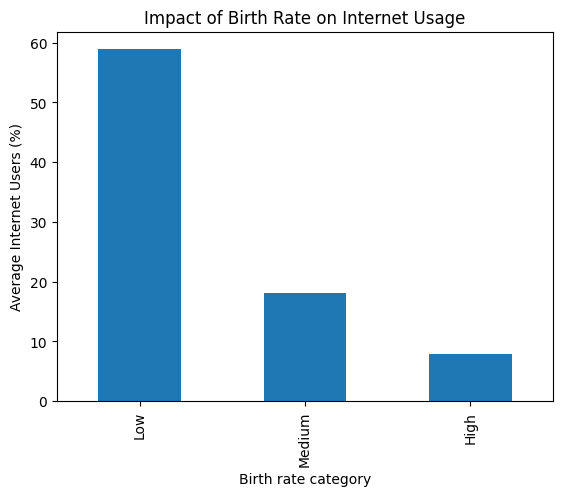

In [48]:
birth_rate_impact.plot(kind='bar')
plt.title('Impact of Birth Rate on Internet Usage')
plt.ylabel('Average Internet Users (%)')
plt.show()

<h2> Insight 5 </h2>

<h3>Countries with low birth rates have significantly higher internet usage, averaging nearly 59%, compared to just 8% in high birth rate nations. Medium birth rate countries fall in between at around 18%. This sharp contrast suggests that lower birth rates often correlate with greater economic development and digital infrastructure, reinforcing the link between demographic trends and technological access. </h3>

<hr style="border: 3px solid crimson; width: 90%; margin-left: auto; margin-right: auto; border-radius: 10px;">

<h1> 6. What is the distribution of internet users across different countries?

In [57]:
# Find the countries with the highest and lowest internet usage
max_country = internet.loc[internet['Internet users'].idxmax(), 'Country Name']
min_country = internet.loc[internet['Internet users'].idxmin(), 'Country Name']
max_country, min_country

('Iceland', 'Eritrea')

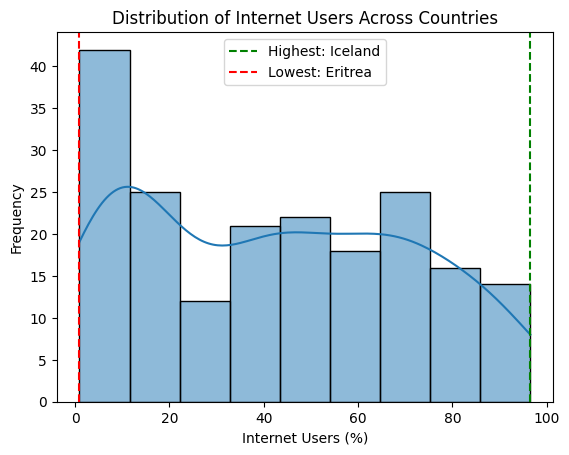

In [58]:
sns.histplot(internet['Internet users'], kde=True)
plt.title('Distribution of Internet Users Across Countries')
plt.xlabel('Internet Users (%)')
plt.ylabel('Frequency')

# Mark the countries with the highest and lowest internet usage on the plot
plt.axvline(internet['Internet users'].max(), color='green', linestyle='--', label=f'Highest: {max_country}')
plt.axvline(internet['Internet users'].min(), color='red', linestyle='--', label=f'Lowest: {min_country}')

# Add a legend to show which countries are marked
plt.legend()

plt.show()

<h2> Insight 6 </h2>

<h3> The distribution of internet users across countries reveals a striking contrast. Iceland, with nearly full internet penetration, stands at the top, while Eritrea has the lowest internet usage, reflecting the significant digital divide between developed and developing nations. This disparity underscores the need for more global efforts to improve digital infrastructure and accessibility, particularly in less connected regions. </h3>

<hr style="border: 3px solid crimson; width: 90%; margin-left: auto; margin-right: auto; border-radius: 10px;">

<h1> 7. Which countries have the lowest internet usage?

In [60]:
lowest_internet_usage = internet.nsmallest(5, 'Internet users')
lowest_internet_usage[['Country Name', 'Internet users']]

,Country Name,Internet users
52,Eritrea,0.9
172,Timor-Leste,1.1
11,Burundi,1.3
156,Somalia,1.5
64,Guinea,1.6


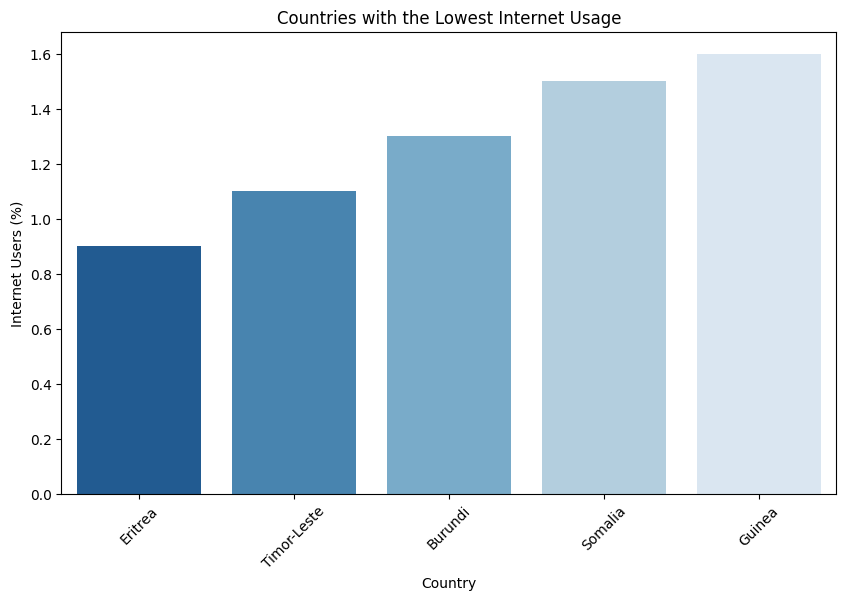

In [62]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Country Name', y='Internet users', data=lowest_internet_usage, palette='Blues_r')
plt.title('Countries with the Lowest Internet Usage')
plt.xlabel('Country')
plt.ylabel('Internet Users (%)')
plt.xticks(rotation=45)
plt.show()

<h2> Insight 7 </h2>

<h3> Countries like Eritrea (0.9%) and Timor-Leste (1.1%) are at the bottom of the global internet usage spectrum, with access limited to a small fraction of the population. These nations face significant challenges in digital infrastructure and connectivity, highlighting the need for focused international efforts to bridge the digital divide in low-access regions. </h3>

<hr style="border: 3px solid crimson; width: 90%; margin-left: auto; margin-right: auto; border-radius: 10px;">

<h1> 8. Is there a significant difference in birth rates between countries with high and low internet usage?

In [68]:
median_usage = internet['Internet users'].median()
internet['Usage Group'] = internet['Internet users'].apply(lambda x: 'High Usage' if x > median_usage else 'Low Usage')

birth_by_usage

Usage Group
High Usage    13.498670
Low Usage     29.359847
Name: Birth rate, dtype: float64

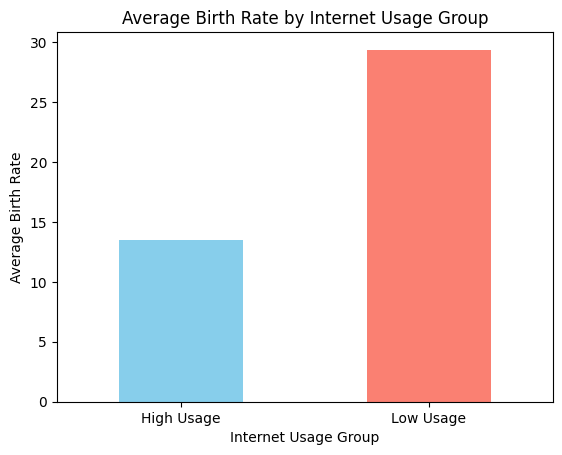

In [70]:
birth_by_usage = internet.groupby('Usage Group')['Birth rate'].mean()
birth_by_usage.plot(kind='bar', color=['skyblue', 'salmon'])

plt.title('Average Birth Rate by Internet Usage Group')
plt.ylabel('Average Birth Rate')
plt.xlabel('Internet Usage Group')
plt.xticks(rotation=0)
plt.show()

<h2> Insight 8 </h2>

<h3> Countries with low internet usage have an average birth rate more than twice as high as those with high usage (29.36 vs. 13.50). This sharp contrast suggests a strong inverse relationship between digital access and birth rates, reflecting how increased connectivity often correlates with improved education, healthcare access, and lower fertility in more developed or urbanized regions. </h3>

<hr style="border: 3px solid crimson; width: 90%; margin-left: auto; margin-right: auto; border-radius: 10px;">

<h1> 9. Are there any significant differences in internet usage between countries with different birth rates?

In [72]:
print(internet.groupby('Birth rate category')['Internet users'].mean())

Birth rate category
Low       58.904313
Medium    18.184167
High       7.871154
Name: Internet users, dtype: float64


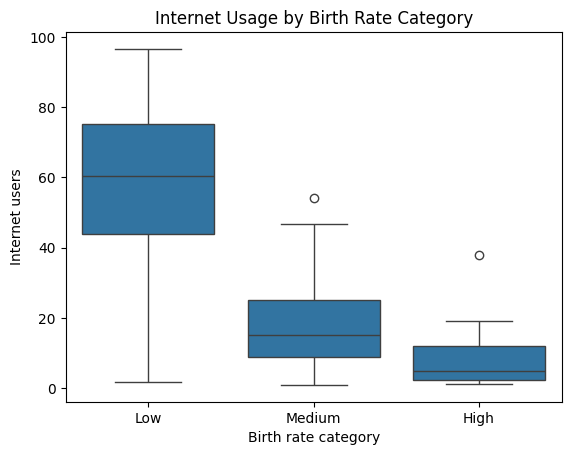

In [29]:
sns.boxplot(x='Birth rate category', y='Internet users', data=internet)
plt.title('Internet Usage by Birth Rate Category')
plt.show()

<h2> Insight 9 </h2>

<h3> ountries with a low birth rate category have significantly higher average internet usage (58.90%) compared to those with medium (18.18%) and high birth rates (7.87%). This suggests that nations with lower fertility rates are likely to have better access to digital infrastructure and higher levels of technological development, while countries with higher birth rates may face challenges in expanding internet access, often linked to lower economic development and rural populations. </h3>

<hr style="border: 3px solid crimson; width: 90%; margin-left: auto; margin-right: auto; border-radius: 10px;">

<h1> 10. How do income groups correlate with birth rate across countries?

In [73]:
internet.groupby('Income Group')['Birth rate'].mean()

Income Group
High income            12.753433
Low income             37.238267
Lower middle income    26.309140
Upper middle income    18.740646
Name: Birth rate, dtype: float64

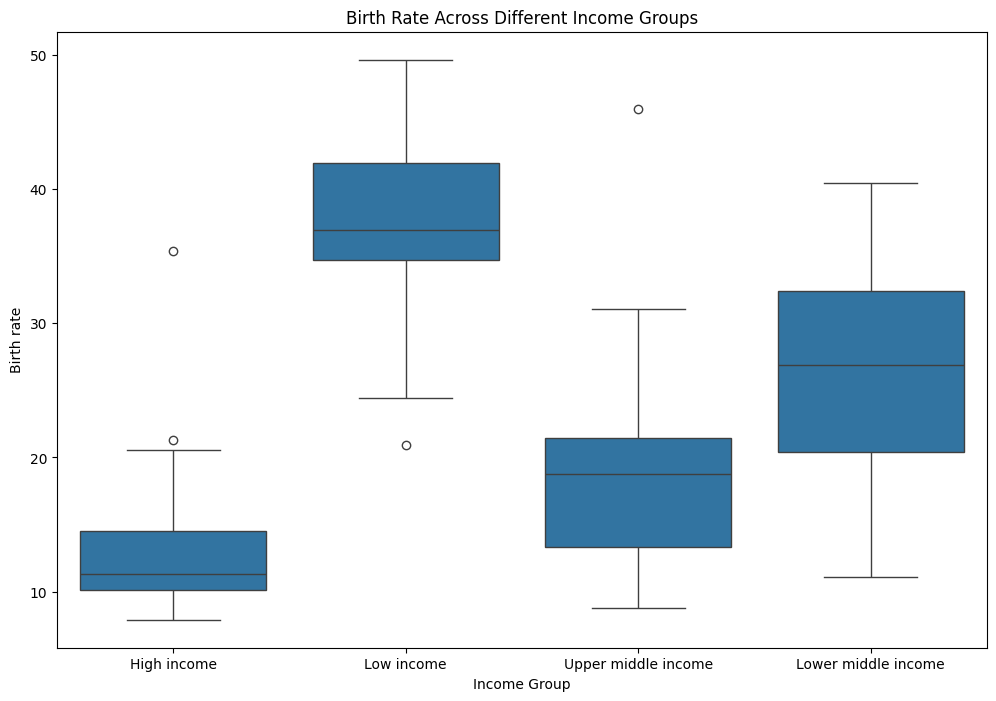

In [74]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Income Group', y='Birth rate', data=internet)
plt.title('Birth Rate Across Different Income Groups')
plt.show()

<h2> Insight 10 </h2>

<h3> Countries in the High income group exhibit significantly lower average birth rates (12.75) compared to those in Low income (37.24) and Lower middle income (26.31) groups. This suggests that wealthier nations typically experience demographic transitions, with lower fertility rates due to factors like urbanization, better access to healthcare, and greater family planning options. </h3>

<hr style="border: 3px solid crimson; width: 90%; margin-left: auto; margin-right: auto; border-radius: 10px;">